In [3]:
import sys
import os
from pathlib import Path

pwd  = Path(os.getcwd())
sys.path.append(str(pwd.parent)) # needed to use "koray" module

In [4]:
import pandas as pd
import numpy as np

In [5]:
from koray.feature_calculation.util import get_features

conference_invitations = [
# 'NeurIPS.cc/2022/Conference/-/Blind_Submission',
'ICLR.cc/2023/Conference/-/Blind_Submission',
# 'ICLR.cc/2022/Conference/-/Blind_Submission',
# 'ICLR.cc/2021/Conference/-/Blind_Submission',
]

feature_df = list(get_features(conference_invitations, disable_cache=True))
# feature_df = list(get_features(conference_invitations, disable_cache=False))
df = pd.concat(feature_df)
df


Calculating features for ICLR.cc/2023/Conference/-/Blind_Submission (1/1)
✔ Successfully loaded dataframes


100%|██████████| 3796/3796 [00:21<00:00, 180.18it/s]
c:\Users\Yusuf Nar\Desktop\data-literacy-group16\koray\feature_calculation\paper_features.py:131: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.feature_df[col] = self.feature_df[col].astype(dtype)
c:\Users\Yusuf Nar\Desktop\data-literacy-group16\koray\feature_calculation\paper_features.py:131: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.feature_df[col] = self.feature_df[col].astype(dtype)
c:\Users\Yusuf Nar\Desktop\data-literacy-group16\koray\feature_calculation\paper_features.py:131: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.feature_df[col] = self.feature_df[col].astype(dtype)
c:\Users\Yusuf Nar\Desktop\data-literacy-gro

✔ Successfully calculated features


,paper_id,abstract_length,author_count,is_accepted,keyword_count,metareview_length,review_count,reviewer_confidence_nanmax,reviewer_confidence_nanmean,reviewer_confidence_nanmedian,...,reviewer_recommendation_yusuf_max_diff,reviewer_technical_novelty_and_significance_nanmax,reviewer_technical_novelty_and_significance_nanmean,reviewer_technical_novelty_and_significance_nanmedian,reviewer_technical_novelty_and_significance_nanmin,reviewer_technical_novelty_and_significance_nanstd,reviewer_technical_novelty_and_significance_nanvar,reviewer_technical_novelty_and_significance_yusuf_max_diff,title_length,tldr_length
0,-0tPmzgXS5,1197.0,5.0,False,3.0,NaN,3.0,4.0,4.000000,4.0,...,1.0,3.0,2.666667,3.0,2.0,0.471405,0.222222,1.0,46.0,131.0
1,-1x2-lp1eZf,1862.0,7.0,False,3.0,NaN,5.0,5.0,4.200000,4.0,...,3.0,3.0,2.400000,2.0,2.0,0.489898,0.240000,1.0,74.0,114.0
2,-2zfgNS917,1497.0,6.0,True,3.0,NaN,4.0,4.0,3.500000,3.5,...,2.0,3.0,2.250000,2.0,2.0,0.433013,0.187500,1.0,75.0,97.0
3,-4DiyBMgv9m,1246.0,2.0,False,0.0,NaN,5.0,4.0,3.000000,3.0,...,5.0,3.0,2.800000,3.0,2.0,0.400000,0.160000,1.0,89.0,0.0
4,-4Maz7s3YXz,1366.0,2.0,False,5.0,NaN,3.0,4.0,4.000000,4.0,...,2.0,3.0,2.666667,3.0,2.0,0.471405,0.222222,1.0,65.0,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3791,zufPou5foW,1393.0,5.0,False,4.0,NaN,4.0,4.0,3.750000,4.0,...,3.0,2.0,2.000000,2.0,2.0,0.000000,0.000000,0.0,82.0,0.0
3792,zyLVMgsZ0U_,1107.0,6.0,True,6.0,NaN,4.0,4.0,3.250000,3.0,...,0.0,4.0,3.500000,3.5,3.0,0.500000,0.250000,1.0,100.0,205.0
3793,zyfEWkV6it,1157.0,5.0,False,3.0,NaN,6.0,5.0,4.000000,4.5,...,3.0,3.0,2.166667,2.0,1.0,0.687184,0.472222,2.0,45.0,0.0
3794,zzL_5WoI3I,965.0,2.0,False,3.0,NaN,3.0,4.0,3.666667,4.0,...,5.0,4.0,3.000000,3.0,2.0,0.816497,0.666667,2.0,83.0,208.0


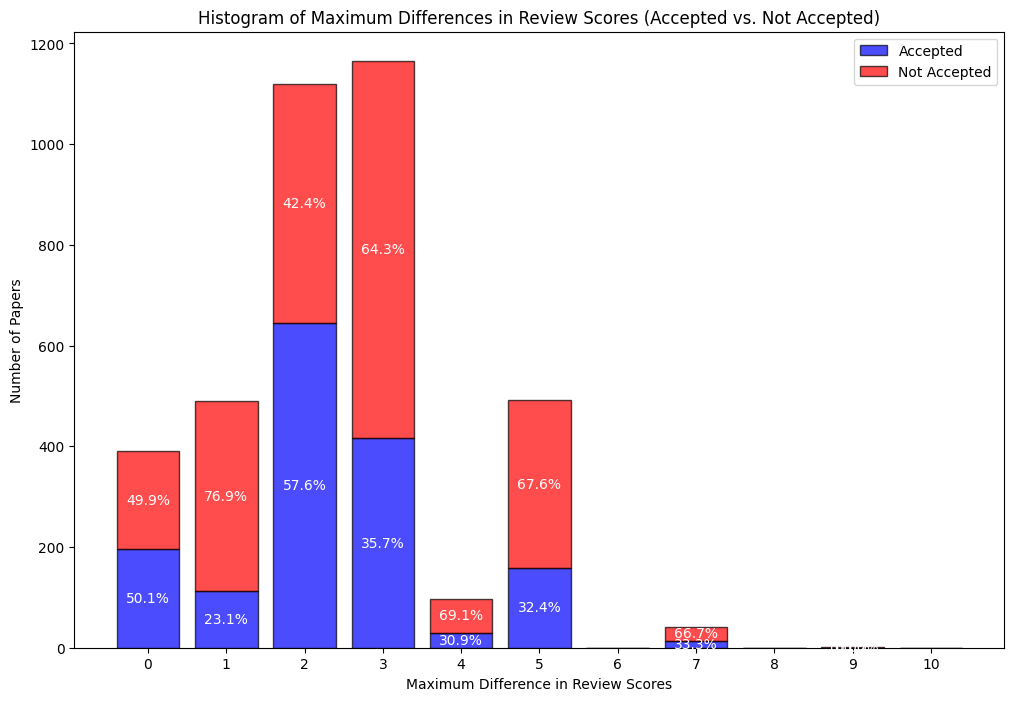

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'max_diff' and 'is_accepted' are the column names
column_name = 'reviewer_recommendation_yusuf_max_diff'  # Replace with the correct column name
acceptance_col = 'is_accepted'  # Replace with the correct column name

# Prepare data for accepted and non-accepted papers
bins = range(0, 12)  # Define bins for integer values from 0 to 10
accepted = df[df[acceptance_col] == True][column_name]
not_accepted = df[df[acceptance_col] == False][column_name]

# Count papers in each bin
accepted_counts, _ = np.histogram(accepted, bins=bins)
not_accepted_counts, _ = np.histogram(not_accepted, bins=bins)
total_counts = accepted_counts + not_accepted_counts

# Define bin centers for integer-centered bins
bin_centers = np.arange(0, 11)  # Integer values from 0 to 10
bar_width = 0.8  # Adjust width to make bars narrower and centered

plt.figure(figsize=(12, 8))

# Plot stacked bars centered on integers
plt.bar(bin_centers, accepted_counts, width=bar_width, label='Accepted', color='blue', alpha=0.7, edgecolor='black')
plt.bar(bin_centers, not_accepted_counts, width=bar_width, label='Not Accepted', color='red', alpha=0.7, edgecolor='black', bottom=accepted_counts)

# Annotate percentages on the bars
for i, (acc, not_acc, total) in enumerate(zip(accepted_counts, not_accepted_counts, total_counts)):
    if total > 0:  # Avoid division by zero
        acc_percentage = (acc / total) * 100
        not_acc_percentage = (not_acc / total) * 100
        
        # Correct placement of percentages
        # Accepted papers' percentage is placed in the center of the blue bar (accepted section)
        plt.text(bin_centers[i], acc / 2, f'{acc_percentage:.1f}%', ha='center', va='center', fontsize=10, color='white')
        
        # Not accepted papers' percentage is placed in the center of the red bar (not accepted section)
        plt.text(bin_centers[i], acc + not_acc / 2, f'{not_acc_percentage:.1f}%', ha='center', va='center', fontsize=10, color='white')

# Add labels, title, and legend
plt.xlabel('Maximum Difference in Review Scores')
plt.ylabel('Number of Papers')
plt.title('Histogram of Maximum Differences in Review Scores (Accepted vs. Not Accepted)')
plt.xticks(ticks=bin_centers)  # Ensure x-axis ticks are at integer values
plt.legend()

# Display the plot
plt.show()

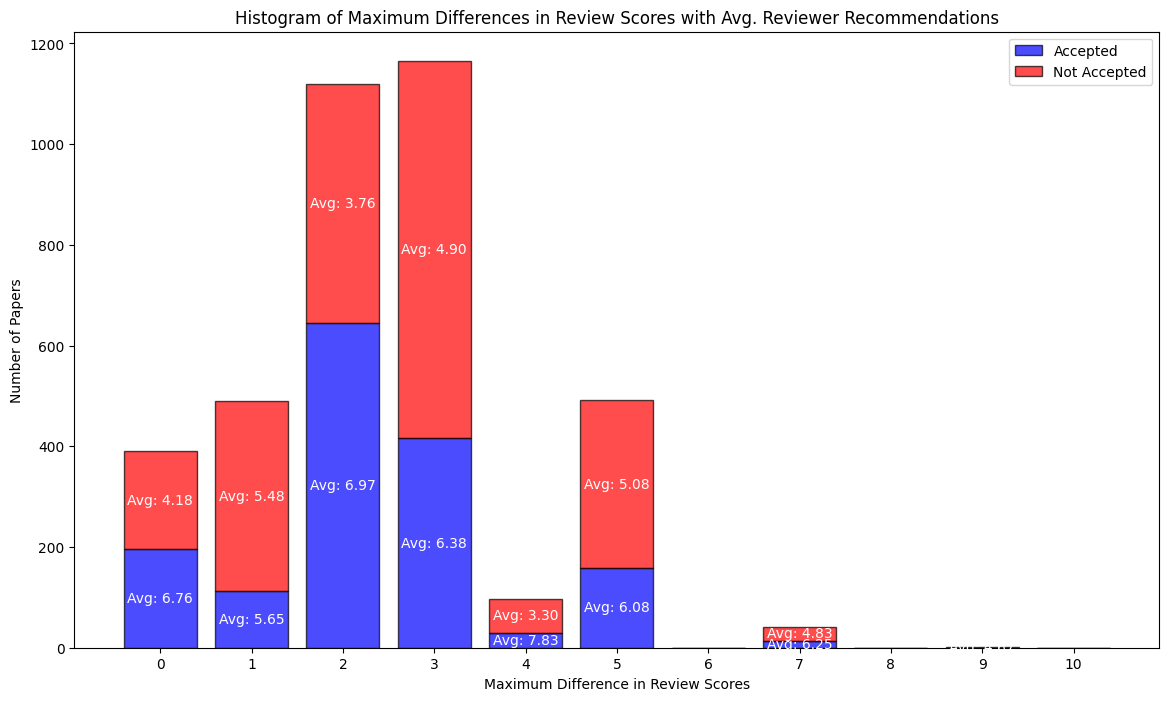

In [9]:
# Assuming 'max_diff', 'is_accepted', and 'reviewer_recommendation_nanmean' are column names
column_name = 'reviewer_recommendation_yusuf_max_diff'  # Column for bins
acceptance_col = 'is_accepted'  # Column for acceptance
recommendation_col = 'reviewer_recommendation_nanmean'  # Column for reviewer recommendations

# Define bins
bins = range(0, 12)  # Define bins for max_diff (0 to 10, inclusive)
bin_centers = np.arange(0, 11)  # Integer values from 0 to 10
bar_width = 0.8  # Adjust bar width

# Initialize lists for averages
accepted_avg_scores = []
not_accepted_avg_scores = []

# Compute averages for each bin
for k in range(0, 11):
    # Filter papers in the current bin
    bin_data = df[df[column_name] == k]
    
    # Compute averages for accepted papers
    accepted_data = bin_data[bin_data[acceptance_col] == True]
    accepted_avg = accepted_data[recommendation_col].mean() if not accepted_data.empty else 0
    accepted_avg_scores.append(accepted_avg)
    
    # Compute averages for not accepted papers
    not_accepted_data = bin_data[bin_data[acceptance_col] == False]
    not_accepted_avg = not_accepted_data[recommendation_col].mean() if not not_accepted_data.empty else 0
    not_accepted_avg_scores.append(not_accepted_avg)

# Plot the stacked bar chart
plt.figure(figsize=(14, 8))
accepted_counts, _ = np.histogram(df[df[acceptance_col] == True][column_name], bins=bins)
not_accepted_counts, _ = np.histogram(df[df[acceptance_col] == False][column_name], bins=bins)
plt.bar(bin_centers, accepted_counts, width=bar_width, label='Accepted', color='blue', alpha=0.7, edgecolor='black')
plt.bar(bin_centers, not_accepted_counts, width=bar_width, label='Not Accepted', color='red', alpha=0.7, edgecolor='black', bottom=accepted_counts)

# Annotate averages on the plot
for i, (acc_count, not_acc_count, acc_avg, not_acc_avg) in enumerate(zip(accepted_counts, not_accepted_counts, accepted_avg_scores, not_accepted_avg_scores)):
    if acc_count > 0:
        plt.text(bin_centers[i], acc_count / 2, f'Avg: {acc_avg:.2f}', ha='center', va='center', fontsize=10, color='white')
    if not_acc_count > 0:
        plt.text(bin_centers[i], acc_count + not_acc_count / 2, f'Avg: {not_acc_avg:.2f}', ha='center', va='center', fontsize=10, color='white')

# Add labels, title, and legend
plt.xlabel('Maximum Difference in Review Scores')
plt.ylabel('Number of Papers')
plt.title('Histogram of Maximum Differences in Review Scores with Avg. Reviewer Recommendations')
plt.xticks(ticks=bin_centers)  # Ensure x-axis ticks are at integer values
plt.legend()

# Display the plot
plt.show()

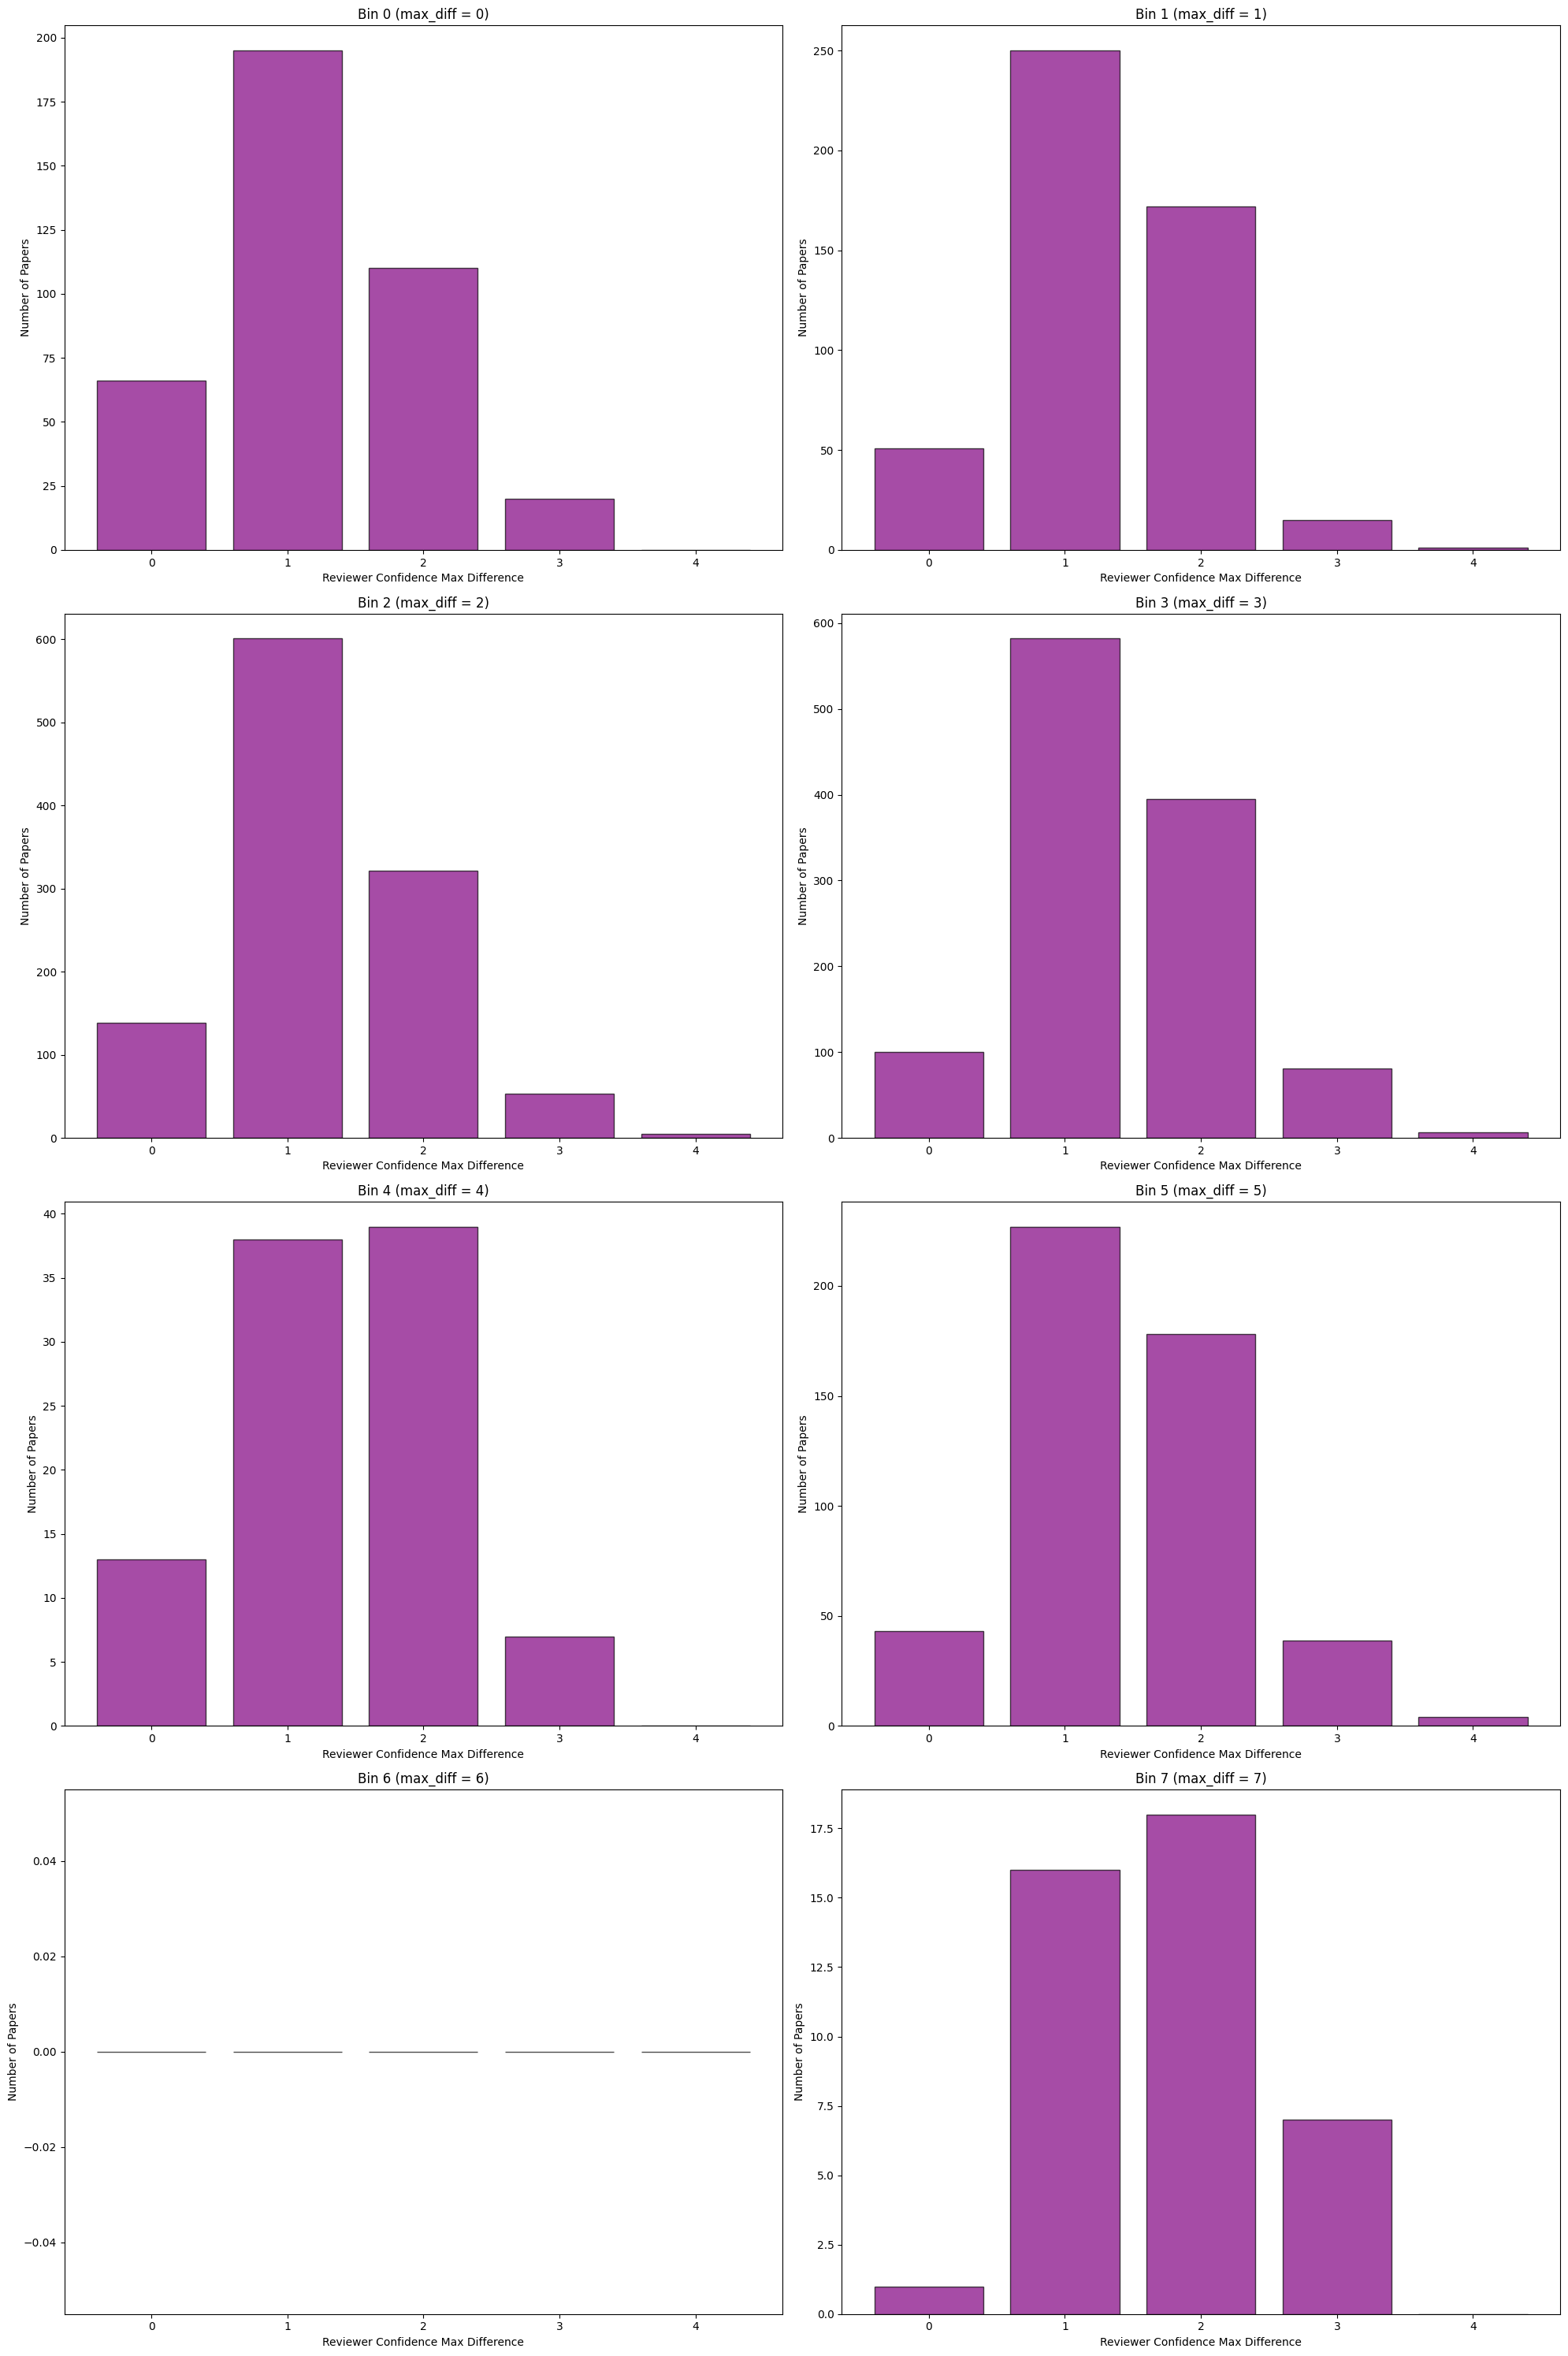

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Define the bins for reviewer confidence differences (0 to 4)
confidence_bins = range(0, 6)  # 0, 1, 2, 3, 4 (inclusive)
confidence_bin_centers = np.arange(0, 5)  # Center bins at integers

# Define the range of max_diff bins to analyze (0 to 7)
max_diff_range = range(0, 8)

# Create sub-histograms for each max_diff bin
plt.figure(figsize=(20, 30))  # Adjust the figure size for multiple subplots
for i, max_diff_value in enumerate(max_diff_range, start=1):
    # Filter papers for the current max_diff bin
    current_bin_papers = df[df['reviewer_recommendation_yusuf_max_diff'] == max_diff_value]
    
    # Count papers for each confidence difference
    confidence_counts, _ = np.histogram(current_bin_papers['reviewer_confidence_yusuf_max_diff'], bins=confidence_bins)
    
    # Create a subplot
    plt.subplot(4, 2, i)  # Arrange plots in a 4x2 grid
    plt.bar(confidence_bin_centers, confidence_counts, width=0.8, color='purple', alpha=0.7, edgecolor='black')
    
    # Add labels and title for the subplot
    plt.xlabel('Reviewer Confidence Max Difference')
    plt.ylabel('Number of Papers')
    plt.title(f'Bin {max_diff_value} (max_diff = {max_diff_value})')
    plt.xticks(ticks=confidence_bin_centers)  # Ensure x-axis ticks are at integer values

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

